In [1]:
# importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# Reading the csv file
df=pd.read_csv("WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv")

# Printing the first five rows
df.head(5)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


# About the data
This sample data has the following columns and data values.
7 columns x 548 rows

1. MarketID: Unique identifier for market (1 – 10).
2. MarketSize: Size of market area by sales (Small, Medium, Large).
3. LocationID: Unique identifier for store location.
4. AgeOfStore: Age of store in years (1 – 28).
5. Promotion: One of three promotions that was tested (1, 2, 3).
6. week: One of four weeks when the promotions were run (1 – 4).
7. SalesInThousands: Sales amount for a specific LocationID, Promotion and week.

In [3]:
# For getting the dimension of the dataset (number of rows, number of coumns)
df.shape

(548, 7)

In [4]:
# For getting the information about the null values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
MarketID            548 non-null int64
MarketSize          548 non-null object
LocationID          548 non-null int64
AgeOfStore          548 non-null int64
Promotion           548 non-null int64
week                548 non-null int64
SalesInThousands    548 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.0+ KB


In [5]:
df["MarketSize"].unique()

array(['Medium', 'Small', 'Large'], dtype=object)

In [6]:
# create the Labelencoder object
le = LabelEncoder()

#convert the categorical columns into numeric
df['MarketSize'] = le.fit_transform(df['MarketSize'])

#display the initial records
df.head(5)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,1,1,4,3,1,33.73
1,1,1,1,4,3,2,35.67
2,1,1,1,4,3,3,29.03
3,1,1,1,4,3,4,39.25
4,1,1,2,5,2,1,27.81


In [7]:
# For getting the information about the null values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
MarketID            548 non-null int64
MarketSize          548 non-null int32
LocationID          548 non-null int64
AgeOfStore          548 non-null int64
Promotion           548 non-null int64
week                548 non-null int64
SalesInThousands    548 non-null float64
dtypes: float64(1), int32(1), int64(5)
memory usage: 27.9 KB


In [8]:
# For seeing some basic statistical details like percentile, mean, std etc
df.describe()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,0.802920,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,0.614742,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,0.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,1.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,1.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,2.000000,920.000000,28.000000,3.000000,4.000000,99.650000


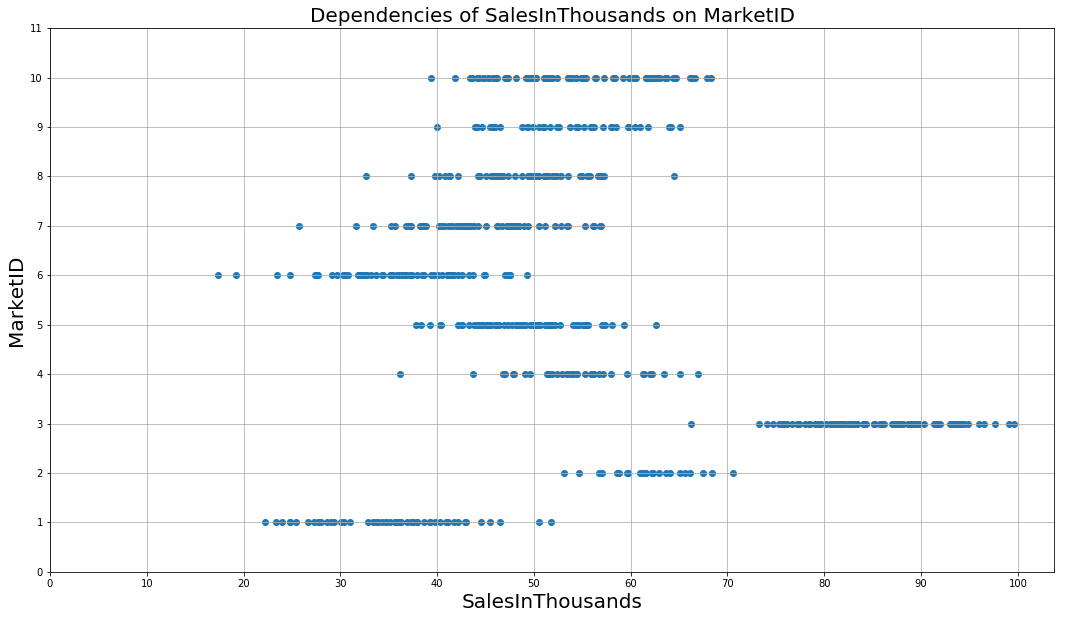

In [9]:
plt.figure(figsize=(18, 10))
plt.scatter(df["SalesInThousands"], df["MarketID"])
plt.yticks(range(int(max(df["MarketID"]))+2))
plt.xticks(range(0, int(max(df["SalesInThousands"]))+2, 10))
plt.xlabel("SalesInThousands", fontsize=20)
plt.ylabel("MarketID", fontsize=20)
plt.title("Dependencies of SalesInThousands on MarketID", fontsize=20)
plt.grid()
plt.show()

Here from the plot we can see that if the MaeketID is 3 then Sales goes higher

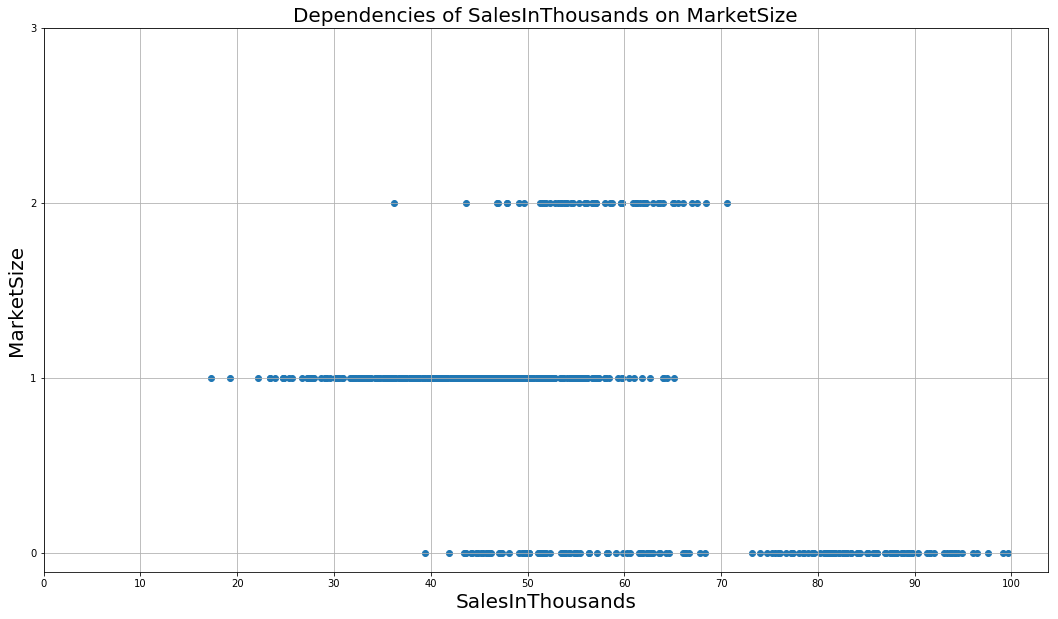

In [10]:
x_axis="SalesInThousands"
y_axis="MarketSize"

plt.figure(figsize=(18, 10))
plt.scatter(df[x_axis], df[y_axis])
plt.yticks(range(int(max(df[y_axis]))+2))
plt.xticks(range(0, int(max(df[x_axis]))+2, 10))
plt.xlabel(x_axis, fontsize=20)
plt.ylabel(y_axis, fontsize=20)
plt.title("Dependencies of "+x_axis+" on "+y_axis, fontsize=20)
plt.grid()
plt.show()

Here from the plot we can see that if the MaeketSize is 0 then Sales goes higher

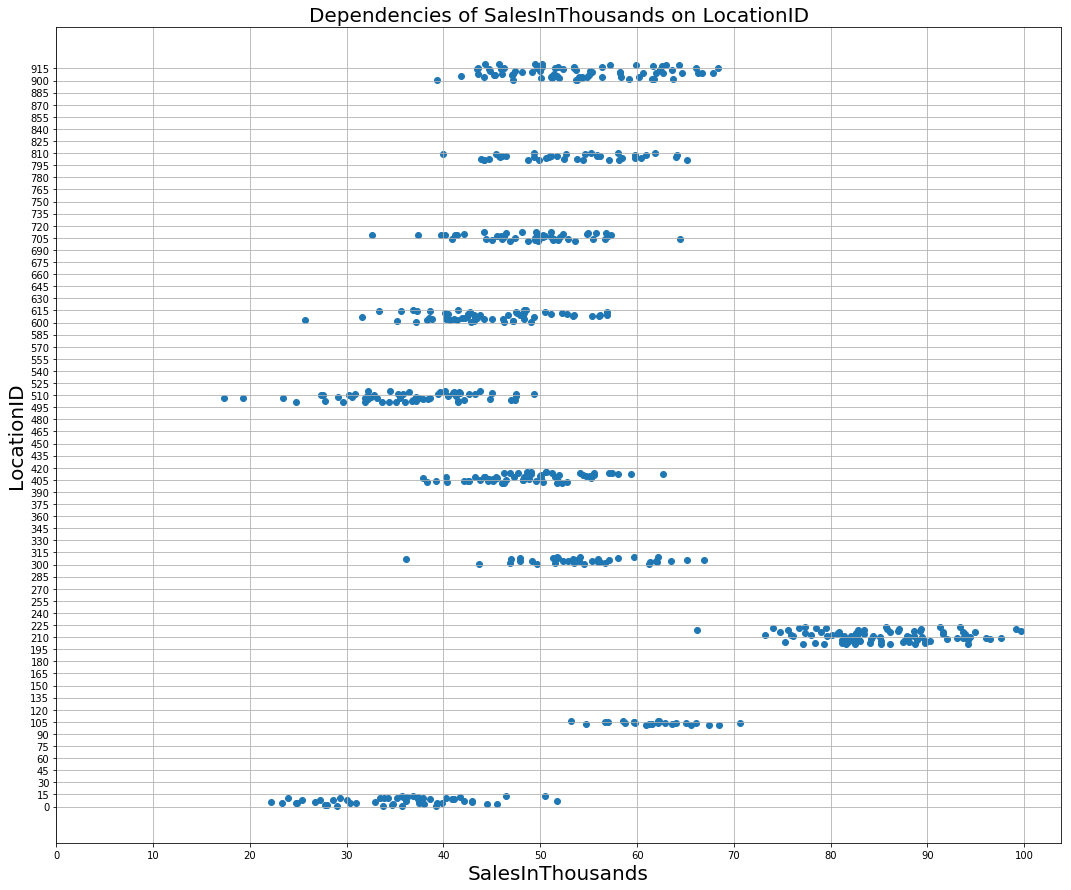

In [11]:
x_axis="SalesInThousands"
y_axis="LocationID"

plt.figure(figsize=(18, 15))
plt.scatter(df[x_axis], df[y_axis])
plt.yticks(range(0, int(max(df[y_axis]))+2, 15))
plt.xticks(range(0, int(max(df[x_axis]))+2, 10))
plt.xlabel(x_axis, fontsize=20)
plt.ylabel(y_axis, fontsize=20)
plt.title("Dependencies of "+x_axis+" on "+y_axis, fontsize=20)
plt.grid()
plt.show()

Here from the plot we can see that if the LocationID is in the range of 210 to 225 then Sales goes higher

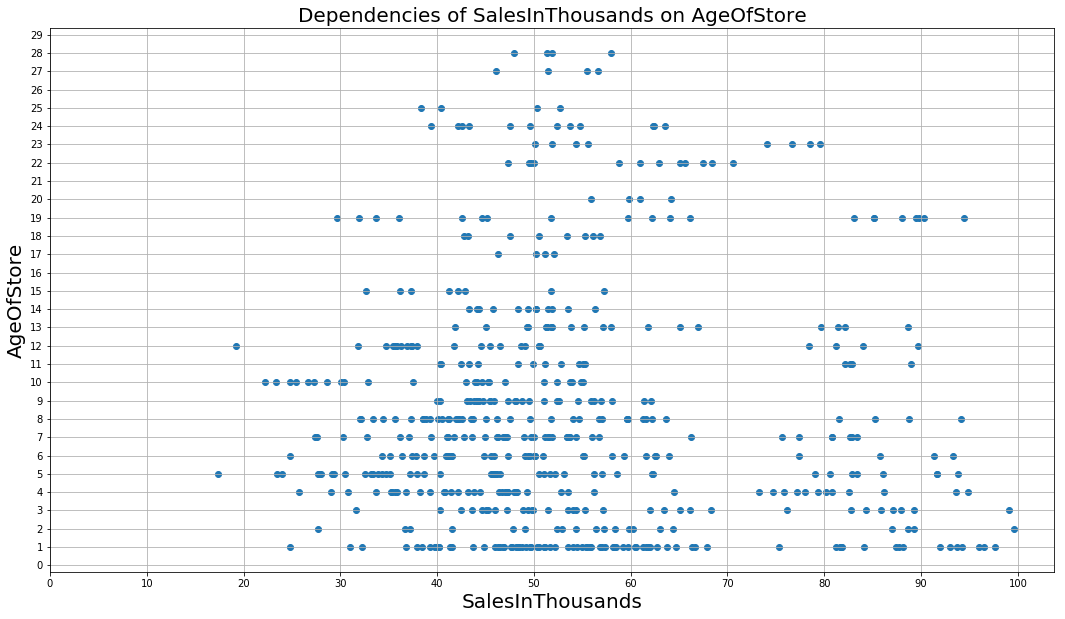

In [12]:
x_axis="SalesInThousands"
y_axis="AgeOfStore"

plt.figure(figsize=(18, 10))
plt.scatter(df[x_axis], df[y_axis])
plt.yticks(range(int(max(df[y_axis]))+2))
plt.xticks(range(0, int(max(df[x_axis]))+2, 10))
plt.xlabel(x_axis, fontsize=20)
plt.ylabel(y_axis, fontsize=20)
plt.title("Dependencies of "+x_axis+" on "+y_axis, fontsize=20)
plt.grid()
plt.show()

Here from the plot we can see that if the AgeOfStore is 2 and 3 then Sales goes higher

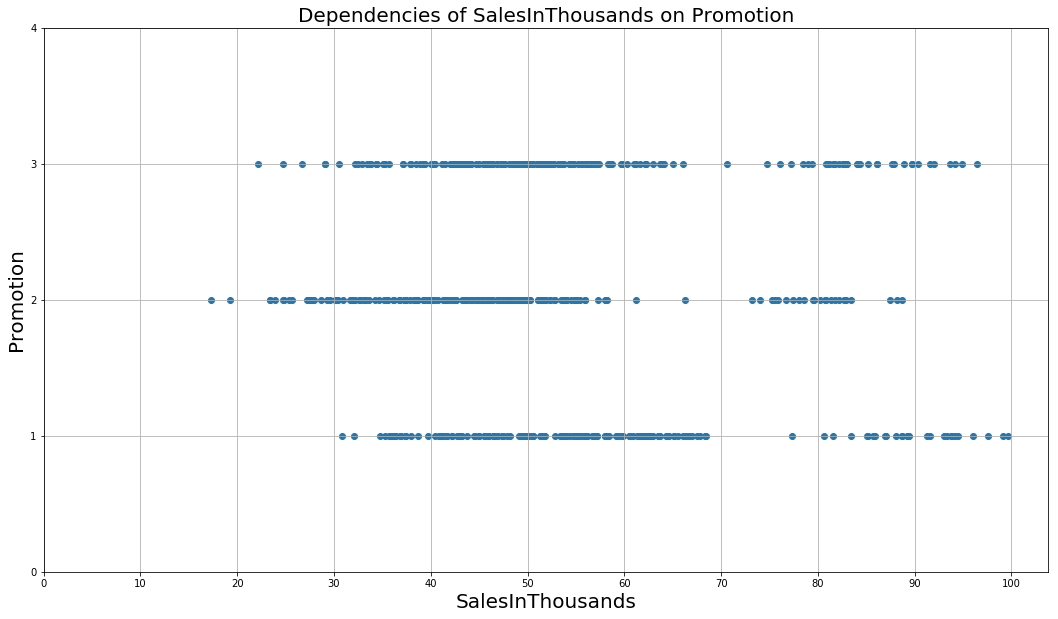

In [13]:
x_axis="SalesInThousands"
y_axis="Promotion"

plt.figure(figsize=(18, 10))
plt.scatter(df[x_axis], df[y_axis])
plt.yticks(range(int(max(df[y_axis]))+2))
plt.xticks(range(0, int(max(df[x_axis]))+2, 10))
plt.xlabel(x_axis, fontsize=20)
plt.ylabel(y_axis, fontsize=20)
plt.title("Dependencies of "+x_axis+" on "+y_axis, fontsize=20)
plt.grid()
plt.show()

Here from the plot we can see that if the Promotion value is 1 then Sales goes higher we can also consider 3 but in the case sales are slightly lower

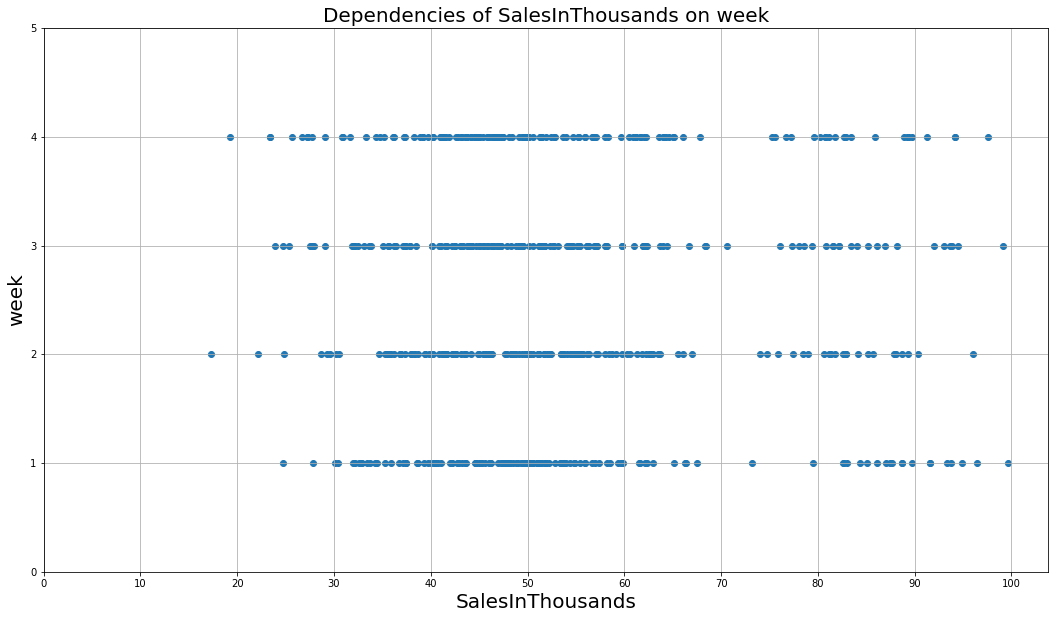

In [14]:
x_axis="SalesInThousands"
y_axis="week"

plt.figure(figsize=(18, 10))
plt.scatter(df[x_axis], df[y_axis])
plt.yticks(range(int(max(df[y_axis]))+2))
plt.xticks(range(0, int(max(df[x_axis]))+2, 10))
plt.xlabel(x_axis, fontsize=20)
plt.ylabel(y_axis, fontsize=20)
plt.title("Dependencies of "+x_axis+" on "+y_axis, fontsize=20)
plt.grid()
plt.show()

Here from the plot we can see that if the week value is 1 then Sales goes higher, if the value is 3 and 4 then sales are also good but slightly lower than before

From the above analysis I can conclude that if the MaeketID is 3, MaeketSize is 0, LocationID is in the range of 210 to 225, AgeOfStore is 2 and 3, Promotion value is 1 and week value is 1 then sales becomes maximum